In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

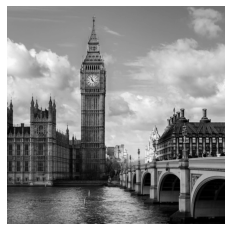

In [3]:
img = cv2.imread(filename="images/london.jpg", flags=0)
plt.figure(), plt.imshow(X=img, cmap="gray"), plt.axis("off");

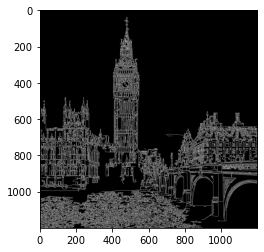

In [6]:
edges = cv2.Canny(image=img, threshold1=0, threshold2=255)
plt.figure(), plt.imshow(X=edges, cmap="gray"), plt.show();

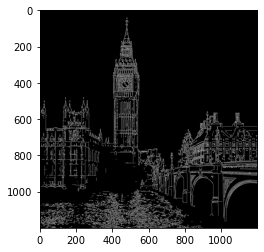

In [7]:
edges2 = cv2.Canny(image=img, threshold1=150, threshold2=255)
plt.figure(), plt.imshow(X=edges2, cmap="gray"), plt.show();

In [8]:
medianThreshold = np.median(img)
meanThreshold = np.mean(img)
print(medianThreshold, meanThreshold)

140.0 127.2525111111111


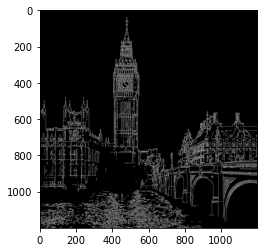

In [10]:
edges3 = cv2.Canny(image=img, threshold1=medianThreshold, threshold2=255)
plt.figure(), plt.imshow(X=edges3, cmap="gray"), plt.show();

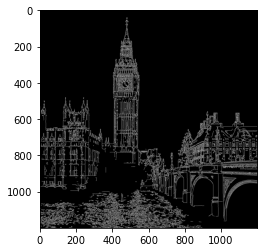

In [13]:
edges4 = cv2.Canny(image=img, threshold1=meanThreshold, threshold2=255)
plt.figure(), plt.imshow(X=edges4, cmap="gray"), plt.show();

In [15]:
low = int(max(0, (1 - 0.33) * medianThreshold))
high = int(min(255, (1 + 0.33) * medianThreshold))
low, high

(93, 186)

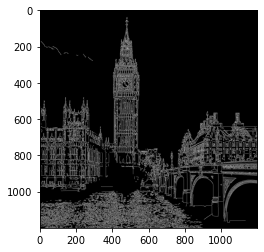

In [16]:
edges5 = cv2.Canny(image=img, threshold1=low, threshold2=high)
plt.figure(), plt.imshow(X=edges5, cmap="gray"), plt.show();

In [20]:
edges5.shape

(1200, 1200)

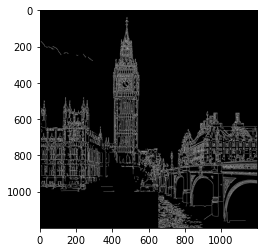

In [43]:
angle = cv2.rectangle(img=edges5, pt1=(0, 1000), pt2=(650, 1200), color=(0), thickness=cv2.FILLED)
plt.imshow(X=angle, cmap="gray");

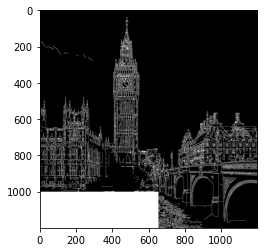

In [60]:
mask = np.zeros(shape=img.shape[:2], dtype=np.uint8)
cv2.rectangle(img=mask, pt1=(0, 1000), pt2=(650, 1200), color=255, thickness=cv2.FILLED)

blurred = cv2.medianBlur(src=edges5, ksize=5)
output = cv2.bitwise_and(src1=edges5, src2=edges5, mask=cv2.bitwise_not(mask))
output = cv2.bitwise_or(output, blurred)
plt.imshow(X=output, cmap="gray");

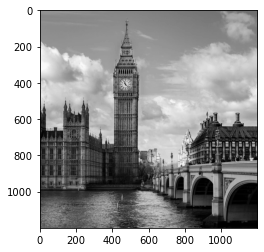

In [63]:
plt.imshow(X=img, cmap="gray");

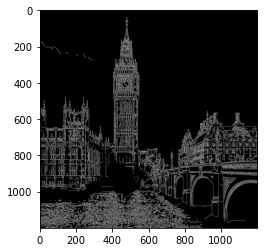

In [65]:
canny = cv2.Canny(image=img, threshold1=100, threshold2=190)
plt.imshow(X=canny, cmap="gray");

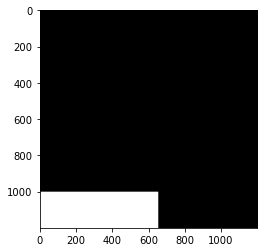

In [72]:
mask = np.zeros(shape=img.shape, dtype=np.uint8)
cv2.rectangle(img=mask, pt1=(0, 1000), pt2=(650, 1200), color=255, thickness=cv2.FILLED)
plt.imshow(X=mask, cmap="gray");

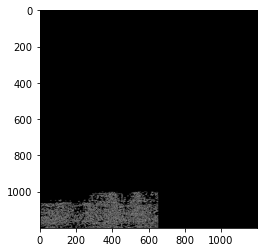

In [73]:
andd = cv2.bitwise_and(src1=canny, src2=canny, mask=mask)
plt.imshow(X=andd, cmap="gray");

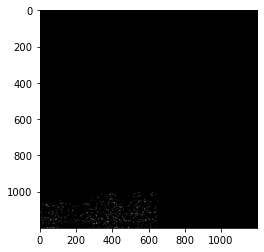

In [ ]:
medianBlur = cv2.medianBlur(src=andd, ksize=5)
plt.imshow(X=medianBlur, cmap="gray");

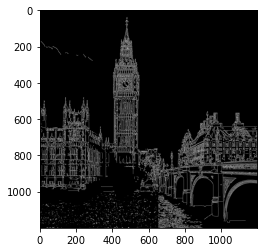

In [89]:
output = cv2.bitwise_and(src1=canny, src2=canny, mask=cv2.bitwise_not(mask))
output = cv2.bitwise_or(output, medianBlur)
plt.imshow(X=output, cmap="gray");

In [77]:
?cv2.bitwise_or

Docstring:
bitwise_or(src1, src2[, dst[, mask]]) -> dst
.   @brief Calculates the per-element bit-wise disjunction of two arrays or an
.   array and a scalar.
.   
.   The function cv::bitwise_or calculates the per-element bit-wise logical disjunction for:
.   *   Two arrays when src1 and src2 have the same size:
.       \f[\texttt{dst} (I) =  \texttt{src1} (I)  \vee \texttt{src2} (I) \quad \texttt{if mask} (I) \ne0\f]
.   *   An array and a scalar when src2 is constructed from Scalar or has
.       the same number of elements as `src1.channels()`:
.       \f[\texttt{dst} (I) =  \texttt{src1} (I)  \vee \texttt{src2} \quad \texttt{if mask} (I) \ne0\f]
.   *   A scalar and an array when src1 is constructed from Scalar or has
.       the same number of elements as `src2.channels()`:
.       \f[\texttt{dst} (I) =  \texttt{src1}  \vee \texttt{src2} (I) \quad \texttt{if mask} (I) \ne0\f]
.   In case of floating-point arrays, their machine-specific bit
.   representations (usually IEEE754-com